## Learning about this dataset:
1. id : Unique id for a news article
2. title : the title of a news article
3. author : author of the news article
4. text : the text of the article; this even might be incomplete
5. label : a label that marks whether the news article is real or fake.

1: Fake News

0: Real News

Lets start with importing the necessary dependencies

In [2]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
# Here we are printing the stopwords in English
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

## Data Pre-processing

In [5]:
# 1 Loading the dataset
news_df = pd.read_csv('fake-news/train.csv')

In [6]:
news_df.shape

(20800, 5)

In [7]:
print(news_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB
None


In [8]:
# Lets print the first five rows of the dataframe
news_df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [9]:
# Counting the number of missing values in our dataframe
news_df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [10]:
# Replacing the null values with empty string
news_df = news_df.fillna('')

In [11]:
# Merging the author name and news title
news_df['content'] = news_df['author'] + ' ' + news_df['title']

In [12]:
# printing the content column to confirm its creation
print(news_df['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [13]:
# Separating the data & label
X = news_df.drop(columns = 'label', axis = 1)
Y = news_df['label']

In [14]:
print(X)
print(Y)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

## Stemming
To reduce a word to its Root word..

In [15]:
port_stem = PorterStemmer()

In [16]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]', ' ', content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

In [17]:
news_df['content'] = news_df['content'].apply(stemming)

In [18]:
print(news_df['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [19]:
# Separating the data and label
X = news_df['content'].values
Y = news_df['label'].values

In [20]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [21]:
print(Y)

[1 0 1 ... 0 1 1]


In [22]:
Y.shape

(20800,)

In [23]:
# Now converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)  

In [24]:
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 210687 stored elements and shape (20800, 17128)>
  Coords	Values
  (0, 267)	0.2701012497770876
  (0, 2483)	0.36765196867972083
  (0, 2959)	0.24684501285337127
  (0, 3600)	0.3598939188262558
  (0, 3792)	0.27053324808454915
  (0, 4973)	0.23331696690935097
  (0, 7005)	0.2187416908935914
  (0, 7692)	0.24785219520671598
  (0, 8630)	0.2921251408704368
  (0, 8909)	0.36359638063260746
  (0, 13473)	0.2565896679337956
  (0, 15686)	0.2848506356272864
  (1, 1497)	0.2939891562094648
  (1, 1894)	0.15521974226349364
  (1, 2223)	0.3827320386859759
  (1, 2813)	0.19094574062359204
  (1, 3568)	0.26373768806048464
  (1, 5503)	0.7143299355715573
  (1, 6816)	0.1904660198296849
  (1, 16799)	0.30071745655510157
  (2, 2943)	0.3179886800654691
  (2, 3103)	0.46097489583229645
  (2, 5389)	0.3866530551182615
  (2, 5968)	0.3474613386728292
  (2, 9620)	0.49351492943649944
  :	:
  (20797, 3643)	0.2115550061362374
  (20797, 7042)	0.21799048897828685
  (2079

## Splitting the data into training & testing data

In [25]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state=2)

## Creating a Base Model (Logistic Regression)

In [26]:
log_model = LogisticRegression()

In [27]:
log_model.fit(X_train, Y_train)

LogisticRegression()

In [28]:
log_accuracy = accuracy_score(Y_test, log_model.predict(X_test))

In [29]:
print(f'Baseline Logistic Regression Accuracy: {log_accuracy:.4f}')

Baseline Logistic Regression Accuracy: 0.9791


## Hyperparameter Tuning

For Logistic Regression

In [30]:
log_params = {'C': [0.01, 0.1, 1, 10, 100], 'max_iter': [100, 200, 300]}
log_grid = GridSearchCV(LogisticRegression(), log_params, cv=3, n_jobs=-1, verbose=2)
log_grid.fit(X_train, Y_train)

Fitting 3 folds for each of 15 candidates, totalling 45 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300]},
             verbose=2)

In [31]:
print("Best Logistic Regression Parameters:", log_grid.best_params_)

Best Logistic Regression Parameters: {'C': 100, 'max_iter': 100}


For Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, None], 'min_samples_split': [2, 5, 10]}
rf_grid = GridSearchCV(RandomForestClassifier(random_state=2), rf_params, cv=3, n_jobs=-1, verbose=2)
rf_grid.fit(X_train, Y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=2), n_jobs=-1,
             param_grid={'max_depth': [10, 20, None],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [34]:
print("Best Random Forest Parameters:", rf_grid.best_params_)

Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 300}


For SVM

In [35]:
from sklearn.svm import SVC

In [36]:
svm_params = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
svm_grid = GridSearchCV(SVC(probability=True), svm_params, cv=3, n_jobs=-1, verbose=2)
svm_grid.fit(X_train, Y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
             verbose=2)

In [37]:
print("Best SVM Parameters:", svm_grid.best_params_)

Best SVM Parameters: {'C': 10, 'kernel': 'linear'}


## Training the Model: Logistic Regression

In [38]:
best_log_model = LogisticRegression(**log_grid.best_params_)
best_log_model.fit(X_train, Y_train)

LogisticRegression(C=100)

Model Evaluation

Accuracy Score

In [39]:
# Accuracy score on the training data
X_train_prediction = best_log_model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [40]:
print('Accuracy score of the training data: ', training_data_accuracy)

Accuracy score of the training data:  0.99921875


In [41]:
# Accuracy score on the testing data
X_test_prediction = best_log_model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [42]:
print('Accuracy score of the testing data: ', testing_data_accuracy)

Accuracy score of the testing data:  0.9901442307692307


## Training a model: Random Forest Model

In [43]:
best_rf_model = RandomForestClassifier(random_state=2, **rf_grid.best_params_)
best_rf_model.fit(X_train, Y_train)

RandomForestClassifier(min_samples_split=10, n_estimators=300, random_state=2)

In [44]:
# Evaluating the model on test data
rf_predictions = best_rf_model.predict(X_test)
rf_accuracy = accuracy_score(Y_test, rf_predictions)

In [45]:
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.9918269230769231


## Training a model: Support Vector Machine (SVM) Model

In [46]:
best_svm_model = SVC(probability=True, **svm_grid.best_params_)
best_svm_model.fit(X_train, Y_train)

SVC(C=10, kernel='linear', probability=True)

In [47]:
# Evaluating the model on test data
svm_predictions = best_svm_model.predict(X_test)
svm_accuracy = accuracy_score(Y_test, svm_predictions)

In [48]:
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.9930288461538461


In [49]:
# Now lets compare the performances of all three models to find which one is more accurate.
print("Logistic Regression Accuracy:", testing_data_accuracy)
print("Random Forest Accuracy:", rf_accuracy)
print("SVM Accuracy:", svm_accuracy)

Logistic Regression Accuracy: 0.9901442307692307
Random Forest Accuracy: 0.9918269230769231
SVM Accuracy: 0.9930288461538461


## Model Overfit Evaluation

In [50]:
# Comparing training and testing accuracy
def check_overfitting(model, X_train, Y_train, X_test, Y_test, model_name):
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_acc = accuracy_score(Y_train, train_pred)
    test_acc = accuracy_score(Y_test, test_pred)

    print(f"\n{model_name} Overfitting Analysis:")
    print(f"Training Accuracy: {train_acc:.4f}")
    print(f"Testing Accuracy: {test_acc:.4f}")
    print(f"Generalization Gap (Train - Test): {train_acc - test_acc:.4f}")

# Run analysis for each model
check_overfitting(best_log_model, X_train, Y_train, X_test, Y_test, "Logistic Regression")
check_overfitting(best_rf_model, X_train, Y_train, X_test, Y_test, "Random Forest")
check_overfitting(best_svm_model, X_train, Y_train, X_test, Y_test, "SVM")



Logistic Regression Overfitting Analysis:
Training Accuracy: 0.9992
Testing Accuracy: 0.9901
Generalization Gap (Train - Test): 0.0091

Random Forest Overfitting Analysis:
Training Accuracy: 0.9999
Testing Accuracy: 0.9918
Generalization Gap (Train - Test): 0.0081

SVM Overfitting Analysis:
Training Accuracy: 0.9999
Testing Accuracy: 0.9930
Generalization Gap (Train - Test): 0.0069


The models demonstrate excellent generalization capability because their training accuracy differences from testing accuracy remain below 0.01. The models demonstrate high testing accuracy levels of approximately 99% which indicates their effectiveness when processing previously unseen data sets. The accuracy patterns between Logistic Regression Random Forest and SVM match each other because all three methods have avoided excessive memorization of training instances.

## Model Evaluation

In [51]:
# ## Model Evaluation
models = {"Logistic Regression": best_log_model, "Random Forest": best_rf_model, "SVM": best_svm_model}

def evaluate_model(model, X_test, Y_test, model_name):
    predictions = model.predict(X_test)
    accuracy = accuracy_score(Y_test, predictions)
    print(f"\n🔍 {model_name} Performance:")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(Y_test, predictions))
    print("Confusion Matrix:\n", confusion_matrix(Y_test, predictions))

evaluate_model(best_log_model, X_test, Y_test, "Logistic Regression")
evaluate_model(best_rf_model, X_test, Y_test, "Random Forest")
evaluate_model(best_svm_model, X_test, Y_test, "SVM")


🔍 Logistic Regression Performance:
Accuracy: 0.9901
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2077
           1       0.99      0.99      0.99      2083

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160

Confusion Matrix:
 [[2053   24]
 [  17 2066]]

🔍 Random Forest Performance:
Accuracy: 0.9918
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2077
           1       0.99      0.99      0.99      2083

    accuracy                           0.99      4160
   macro avg       0.99      0.99      0.99      4160
weighted avg       0.99      0.99      0.99      4160

Confusion Matrix:
 [[2055   22]
 [  12 2071]]

🔍 SVM Performance:
Accuracy: 0.9930
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2077
        

## Summary Table Comparing All Models

In [52]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Function to get all key metrics
def get_metrics(model, X_test, Y_test):
    predictions = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(Y_test, predictions),
        "Precision": precision_score(Y_test, predictions),
        "Recall": recall_score(Y_test, predictions),
        "F1-Score": f1_score(Y_test, predictions)
    }

# Collecting metrics for all models
models = {
    "Logistic Regression": best_log_model,
    "Random Forest": best_rf_model,
    "SVM": best_svm_model
}

# Creating DataFrame
results = {name: get_metrics(model, X_test, Y_test) for name, model in models.items()}
df_results = pd.DataFrame(results).T  # Transpose for better readability

# Display results
print("\n Model Performance Comparison Table:\n")
print(df_results)




 Model Performance Comparison Table:

                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.990144   0.988517  0.991839  0.990175
Random Forest        0.991827   0.989489  0.994239  0.991858
SVM                  0.993029   0.994225  0.991839  0.993031


## Calculating False Positive Rate (FPR)

In [53]:
def calculate_fpr(model, X_test, Y_test, model_name):
    cm = confusion_matrix(Y_test, model.predict(X_test))
    FP = cm[0][1]  # False Positives
    TN = cm[0][0]  # True Negatives
    fpr = FP / (FP + TN)
    print(f"{model_name} False Positive Rate (FPR): {fpr:.4f}")

calculate_fpr(best_log_model, X_test, Y_test, "Logistic Regression")
calculate_fpr(best_rf_model, X_test, Y_test, "Random Forest")
calculate_fpr(best_svm_model, X_test, Y_test, "SVM")


Logistic Regression False Positive Rate (FPR): 0.0116
Random Forest False Positive Rate (FPR): 0.0106
SVM False Positive Rate (FPR): 0.0058


## Data Visualization

### Bar Chart - Fake vs. Real News Distribution

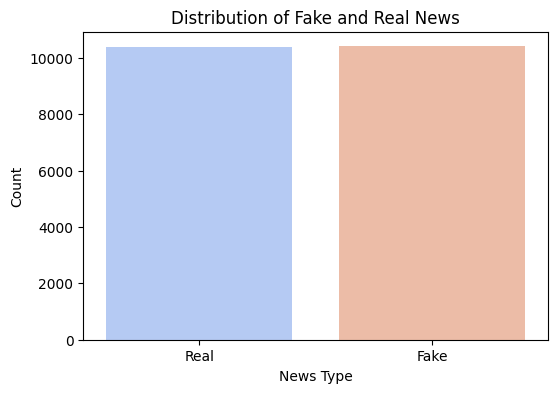

In [54]:
# Count of real vs fake news
plt.figure(figsize=(6, 4))
sns.countplot(x="label", hue="label", data=news_df, palette="coolwarm", legend=False)  # Explicitly setting hue
plt.xlabel("News Type")
plt.ylabel("Count")
plt.title("Distribution of Fake and Real News")
plt.xticks(ticks=[0, 1], labels=["Real", "Fake"])
plt.show()

Here we can see that the distribution of real news articles matches duplicates of fake news articles with both containing approximately 10000 examples. The blue portion indicates genuine news reports whereas fake news is displayed using the orange shade. An equal number of real and fake news examples in the dataset helps maintain model neutrality to obtain more accurate classifications without any preference towards a particular class.

### Word Cloud - Most Common Words in Fake vs. Real News

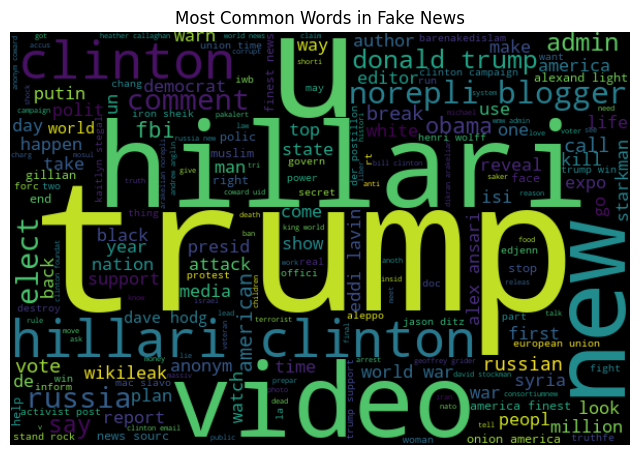

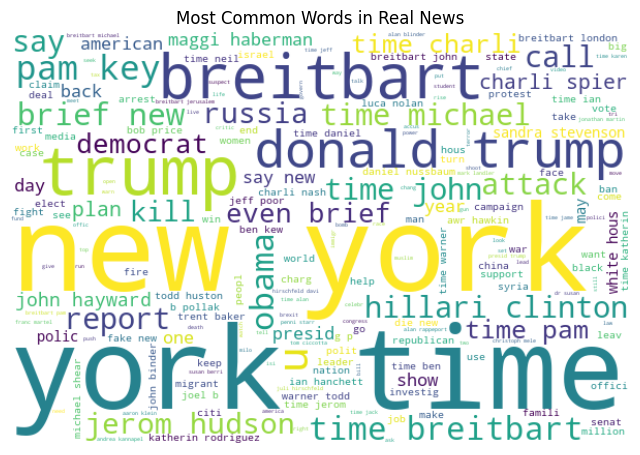

In [55]:
from wordcloud import WordCloud

# Word Cloud for Fake News
fake_text = " ".join(news_df[news_df["label"] == 1]["content"])
wordcloud_fake = WordCloud(width=600, height=400, background_color="black").generate(fake_text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud_fake, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Fake News")
plt.show()

# Word Cloud for Real News
real_text = " ".join(news_df[news_df["label"] == 0]["content"])
wordcloud_real = WordCloud(width=600, height=400, background_color="white").generate(real_text)

plt.figure(figsize=(8,6))
plt.imshow(wordcloud_real, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Real News")
plt.show()


The Word Clouds identify the most frequently used words within fake news documents along with real news documents. Words "Trump Hillary Clinton video Russia" along with "Trump" appear repeatedly in fake news items (top right). The concentration of political figures and sensational content stands out through these words. Real news articles feature "New York Times" prominently whereas fake news articles do not show such established news organizations. Frequent words including "Trump," "Breitbart" along with "Russia" appear repeatedly in both types of content although their discussions might differ in interpretation and reliability.

### Bar Chart - Top 10 Most Frequent Authors

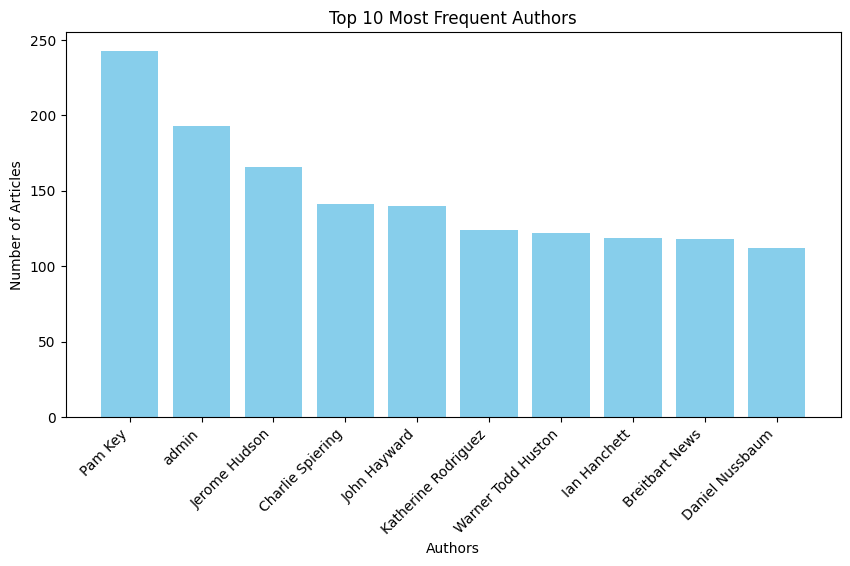

In [56]:
# Remove empty authors
news_df = news_df[news_df['author'] != '']

# Get top 10 authors
top_authors = news_df['author'].value_counts().head(10)

# Plot bar chart
plt.figure(figsize=(10, 5))
plt.bar(top_authors.index, top_authors.values, color='skyblue')

# Labels
plt.xlabel("Authors")
plt.ylabel("Number of Articles")
plt.title("Top 10 Most Frequent Authors")
plt.xticks(rotation=45, ha='right')

plt.show()

From this observation, we check the top 10 authors whose name have been repeatedly used the most. The top 1 author here is "Pam Key" and the top 10th author here is "Daniel Nussbaum".

### Fake vs. Real News Title Length Distribution

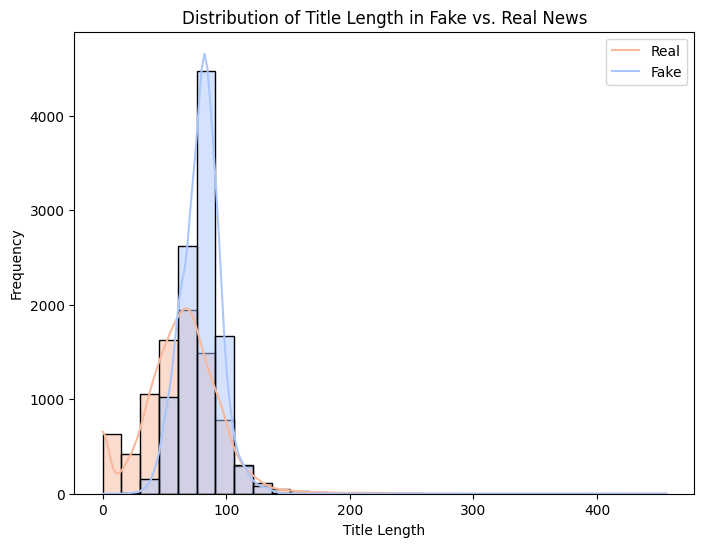

In [57]:
# Calculate title lengths
news_df["title_length"] = news_df["title"].apply(lambda x: len(str(x)))

plt.figure(figsize=(8,6))
sns.histplot(data=news_df, x="title_length", hue="label", bins=30, kde=True, palette="coolwarm")
plt.xlabel("Title Length")
plt.ylabel("Frequency")
plt.title("Distribution of Title Length in Fake vs. Real News")
plt.legend(["Real", "Fake"])
plt.show()


The above histogram compares title lengths in fake (blue) and real (orange) news articles. Fake news titles tend to cluster in the 80 to 100 character zone but real news titles do not display this level of concentration. Fake news shows greater skewness toward the right side together with increased extreme values when compared to real news statistics. Automated fake news detection may be helped by how fake news headlines tend to adopt standardized length measurements.

### TF-IDF Feature Importance (Most Important Words for Fake vs. Real News)

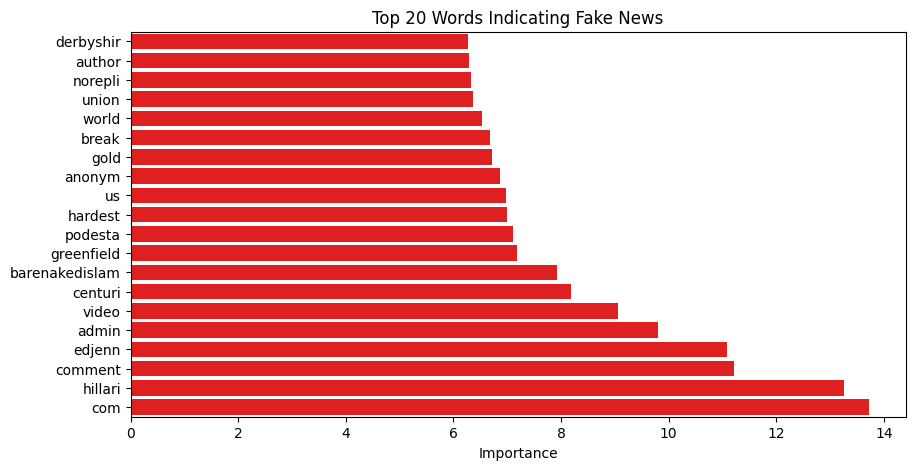

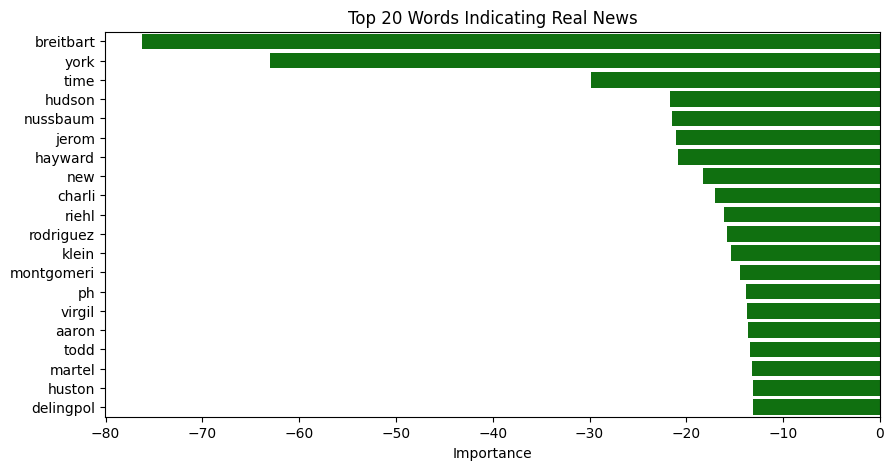

In [58]:
# Get feature names from TF-IDF vectorizer
feature_names = np.array(vectorizer.get_feature_names_out())

# Get logistic regression coefficients
coefficients = best_log_model.coef_.flatten()

# Get top 20 positive & negative words
top_fake_words = feature_names[np.argsort(coefficients)[-20:]]
top_real_words = feature_names[np.argsort(coefficients)[:20]]

# Plot top fake news words
plt.figure(figsize=(10,5))
sns.barplot(x=coefficients[np.argsort(coefficients)[-20:]], y=top_fake_words, color="red")
plt.xlabel("Importance")
plt.title("Top 20 Words Indicating Fake News")
plt.show()

# Plot top real news words
plt.figure(figsize=(10,5))
sns.barplot(x=coefficients[np.argsort(coefficients)[:20]], y=top_real_words, color="green")
plt.xlabel("Importance")
plt.title("Top 20 Words Indicating Real News")
plt.show()

The above chart displays the twenty most indicative terms for fake and real news categories. People encountering fake news will come across "hillari" and other significant terms like "comment" "video" "admin" "podesta" and "comment" in the upper regions of the category. The occurrence of terms "com" and "anonyn" indicates that fake news can be found through sources without identification and website endings.

### Comparing the models with bar chart

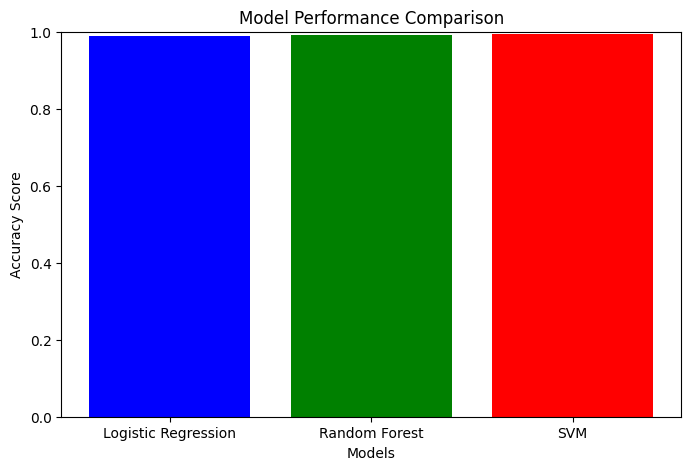

In [59]:
# Model names
models = ["Logistic Regression", "Random Forest", "SVM"]

# Accuracies
accuracies = [
    accuracy_score(Y_test, best_log_model.predict(X_test)),
    accuracy_score(Y_test, best_rf_model.predict(X_test)),
    accuracy_score(Y_test, best_svm_model.predict(X_test))
]

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['blue', 'green', 'red'])
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Model Performance Comparison")
plt.ylim(0, 1)
plt.show()


### ROC Curve Comparison

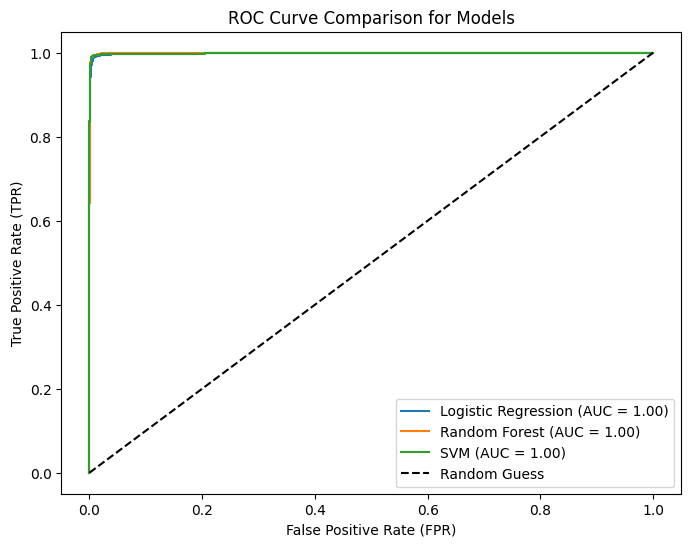

In [60]:
from sklearn.metrics import roc_curve, auc

model_1 = best_log_model
model_2 = best_rf_model
model_3 = best_svm_model 

# Dictionary with model names as keys and model instances as values
models = {
    "Logistic Regression": model_1,
    "Random Forest": model_2,
    "SVM": model_3
}

# Function to plot ROC Curve
def plot_roc_curve(models, X_test, Y_test):
    plt.figure(figsize=(8, 6))

    for name, model in models.items():
        # Get predicted probabilities (ensure SVM has probability=True)
        Y_probs = model.predict_proba(X_test)[:, 1]  
        fpr, tpr, _ = roc_curve(Y_test, Y_probs)
        roc_auc = auc(fpr, tpr)

        # Plot ROC Curve
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    # Plot random guess line
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

    # Labels & Title
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title("ROC Curve Comparison for Models")
    plt.legend()
    plt.show()

# Call function
plot_roc_curve(models, X_test, Y_test)

This ROC curve compares the performance of Logistic Regression, Random Forest, and SVM models. All models achieve complete performance with 1.00 AUC value demonstrating their ability to classify without generating any errors between positives and negatives. The graphs show strong performance because they remain adjacent to the upper left portion of the plot space. These models demonstrate higher performance than random guessing because their results lie above the dotted diagonal line which represents AUC = 0.5. The measurement of a perfect AUC score could indicate that the model fits the data too closely.

## Making a Predictive System

In [61]:
def predict_news(model, X_sample):
    prediction = model.predict(X_sample)
    return "Fake News" if prediction[0] == 1 else "Real News"

# Example usage:
X_new = X_test[4000]

# print("Logistic Regression Prediction:", predict_news(best_log_model, X_new))
# print("Random Forest Prediction:", predict_news(best_rf_model, X_new))
print("SVM Prediction:", predict_news(best_svm_model, X_new))


SVM Prediction: Real News


In [62]:
# Checking if the model's prediction is right or not.
print(Y_test[4000])

0


## Summary

We initiated our project by importing and preparing the dataset that included labeled news content divided into real and fake categories. The combination of the title and author columns produced a new feature named "content" after processing missing values by setting them as empty strings. The text preprocessing operations included stemming for root word reduction and stopping the elimination of common but insignificant words. Our next step involved converting textual data into numerical format with the use of TF-IDF vectorizer so that machine learning processes could be applied. The research data was divided into separate training and testing parts to validate model efficacy.  

Our selections were Logistic Regression combined with Random Forest and Support Vector Machine SVM as machine learning selection models. We first established a baseline logistic regression model then utilized GridSearchCV for tuning its hyperparameters and similar methods for the other three algorithms. Our best parameter set underwent training before receiving assessments through accuracy, precision, recall, and F1-scores. The success rates among the three proposed modes stood equally strong though their false-positive detection rates showed different levels. We were able to evaluate the different models separative power in finding real from fake news content due the help of various visual comparisons.

For further operations, we conducted some investigations through mutiple data visualizations methods that has helped find us more insights. Our analysis investigated fake and real news distributions together with examining most used words through word clouds and determining which authors wrote the most articles. The investigation of title length distributions and identification of key words for fake and real news categories proceeded from TF-IDF feature importance analysis techniques. Our last step involved developing a predictive system utilizing trained models which could determine the fake or real status of new articles. The entire project highlighted the significance of natural language processing together with machine learning in detecting misinformation and displayed different methods that model classification tasks.

### Lets import pickle aba

In [63]:
import pickle

In [ ]:
# Dumping the svm model
# Mathi ko observations bata, we find that even if the accuracies were close, svm had the best one so for the deployment
# we will be using the svm model here.
with open("svm_model.pkl", "wb") as f:
    pickle.dump(best_svm_model, f)

In [65]:
# Dumping the TF-IDF Vectorizer
with open("tfidf_vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)